In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Electrolysis

In [2]:
'''
code to find the electrolysis enthalpy (kWh/kg)
'''
# enthalpy of oxygen as a function of temperature only
def enthalpy_O2(T):
    # Oxygen
    A = 31.32234
    B = -20.23531
    C = 57.86644
    D = -36.50624
    E = -0.007374
    F = -8.903471
    G = 246.7945
    H = 0

    t = (T)/1000   # in K (valid for 100K -- 700K)

    H_t_1_O2 = 0 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H
    
    return H_t_1_O2 # in MJ/kmol. (kJ/mol)

# enthalpy of hydrogen as a function of temperature only
def enthalpy_H2(T):
    # Hydrogen
    A = 33.066178
    B = -11.363417
    C = 11.432816
    D = -2.772874
    E = -0.158558
    F = -9.980797
    G = 172.707974
    H = 0.0

    t = (T)/1000   # in K (valid for 298K -- 1000K)

    H_t_1_H2 = 0 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H
    
    return H_t_1_H2 # in MJ/kmol. (kJ/mol)

# enthalpy of water as a function of temperature only
def enthalpy_H2O(T):
    # Liquid Water
    A = -203.6060
    B = 1523.290
    C = -3196.413
    D = 2474.455
    E = 3.855326
    F = -256.5478
    G = -488.7163
    H = -285.8304

    t = (T)/1000   # in K (valid for 298K -- 500K)

    H_t_1_H2O = -285.8 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H
    
    return H_t_1_H2O # in MJ/kmol. (kJ/mol)

# enthalpy of oxygen as a function of temperature and pressure
def H_O2(T,P):

    # Convert bar to atm
    P = P*0.986923

    # Oxygen
    c1 = -2604
    c2 = 61457
    b1 = 42.6
    b2 = -17400

    H_t_1_O2 = enthalpy_O2(T)   # in MJ/kmol

    dP = P-1  # in atm (it is the change in pressure from 1 atm)
    R = 8.20573660809596*10**-5*10**6 # in atm cm^3/mol.K

    diff = (b1 + 2*b2/T)*dP + (c1 + 1.25*c2/(T**0.5) - (b1 + 2*b2/T)*(b1 + b2/T))*(dP**2)/(R*T)

    # Convert to kJ/kmol
    diff = diff * 0.101325

    # Convert to MJ/kmol
    diff = diff * 10**-3

    H_t_p_O2 = H_t_1_O2 + diff
    
    return H_t_p_O2 # in MJ/kmol. (kJ/mol)

# enthalpy of hydrogen as a function of temperature and pressure
def H_H2(T,P):

    # convert bar to atm
    P = P*0.986923

    # Hydrogen
    c1 = -351
    c2 = 12760
    b1 = 20.5
    b2 = -1857

    H_t_1_H2 = enthalpy_H2(T)   # in MJ/kmol

    dP = P-1  # in atm (it is the change in pressure from 1 atm)
    R = 8.20573660809596*10**-5*10**6 # in atm cm^3/mol.K

    diff = (b1 + 2*b2/T)*dP + (c1 + 1.25*c2/(T**0.5) - (b1 + 2*b2/T)*(b1 + b2/T))*(dP**2)/(R*T)

    # Convert to kJ/kmol   (J/mol)
    diff = diff * 0.101325

    # Convert to MJ/kmol
    diff = diff * 10**-3

    H_t_p_H2 = H_t_1_H2 + diff
    
    return H_t_p_H2 # in MJ/kmol. (kJ/mol)

# functions to define the gradient and intercept of the linear line for the enthalpy of water at T
def gradient(T):
    '''
    putting the data within the functions
    '''
    P = np.array([0,5,10,15,20,25,30,35,40,45,50])*10 # converting to bar
    # the raw [] data is in kJ/kg relative to 0ºC, 
    H2O_20 = (np.array([83.914,88.607,93.281,97.934,102.57,107.18,111.77,116.34,120.90,125.44,129.95])-104.88)*18.015*10**-3-285.820
    H2O_50 = (np.array([209.34,213.64,217.94,222.23,226.51,230.79,235.05,239.31,243.56,247.80,252.03])-104.88)*18.015*10**-3-285.820
    H2O_100 = (np.array([419.17,422.85,426.62,430.39,434.17,437.95,441.74,445.54,449.33,453.14,456.94])-104.88)*18.015*10**-3-285.820
    # now the data is in MJ/kmol
    '''
    putting the data within the functions
    '''
    
    gradient_20 = (H2O_20[10] - H2O_20[0])/(P[10] - P[0])
    gradient_100 = (H2O_100[10] - H2O_100[0])/(P[10] - P[0])
    
    m = (gradient_100 - gradient_20)/(373 - 293)
    c = gradient_20 - 293*m
    
    y = m*T + c
    
    return y

def intercept(T):
    '''
    putting the data within the functions
    '''
    P = np.array([0,5,10,15,20,25,30,35,40,45,50])*10 # converting to bar
    # the raw [] data is in kJ/kg relative to 0ºC, 
    H2O_20 = (np.array([83.914,88.607,93.281,97.934,102.57,107.18,111.77,116.34,120.90,125.44,129.95])-104.88)*18.015*10**-3-285.820
    H2O_50 = (np.array([209.34,213.64,217.94,222.23,226.51,230.79,235.05,239.31,243.56,247.80,252.03])-104.88)*18.015*10**-3-285.820
    H2O_100 = (np.array([419.17,422.85,426.62,430.39,434.17,437.95,441.74,445.54,449.33,453.14,456.94])-104.88)*18.015*10**-3-285.820
    # now the data is in MJ/kmol
    '''
    putting the data within the functions
    '''
    
    start_point_20 = H2O_20[0]
    start_point_100 = H2O_100[0]
    
    m = (start_point_100 - start_point_20)/(373 - 293)
    c = start_point_20 - m*293
    
    y = m*T + c
    
    return y

def H_H2O(T, P):
    
    m = gradient(T)
    c = intercept(T)
    
    y = m*(P-1) + c
    
    return y # in MJ/kmol. (kJ/mol)

# returns the enthalpy needed for electrolysis at T and P in MJ/kmol
def delta_H(T,P):
    
    H_hydrogen = H_H2(T,P)
    H_oxygen = H_O2(T,P)
    H_water = H_H2O(T,P)
    
    delta_H = H_hydrogen + 0.5*H_oxygen - H_water
    
    '''
    the data above is in MJ/kmol
    
    i.e. the above number for delta_H is the amount needed to convert 1kmol of H2O into 1kmol H2 and 1/2kmol O2
    
    below i have converted it to kWh/kg
    '''
    # convert to kg
    # 1kmol H2 = 2.016 kg H2
    delta_H = delta_H*(1/2.016)
    
    # the data is now in MJ/kg
    # 1 MJ = 1,000/3600 kWh
    delta_H = delta_H * (1000/3600)
    
    # the data is now in kWh/kg :)
    
    # including efficiency
    eff = 0.8
    delta_H = delta_H/eff
    
    return delta_H # kWh/kg

# Water Pump

In [3]:
# including the heat demand
def water_pump(T,P):

    # output conditions
    P2 = P  # Bar
    T2 = T  # Kelvin

    # starting conditions
    T1 = 273 + 25  # Kelvin
    P1 = 1  # Bar

    work = H_H2O(T2, P2) - H_H2O(T1, P1)

    return work # in MJ/kmol. (kJ/mol)

# Presentation [-1]

shows that the enthalpy of water at different temps and pressures is always linear and then can show the approximation and how accurate it is

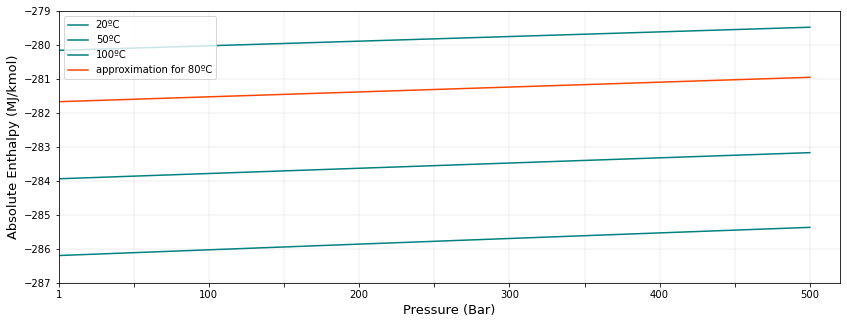

In [48]:
# plot to show the enthalpy of water from the steam tables and the approximation
T = 273+80

p1 = 0
p2 = 500
y1 = H_H2O(T, p1)
y2 = H_H2O(T, p2)

x = np.array([0,5,10,15,20,25,30,35,40,45,50])*10
H2O_20 = (np.array([83.914,88.607,93.281,97.934,102.57,107.18,111.77,116.34,120.90,125.44,129.95])-104.88)*18.015*10**-3-285.820
H2O_50 = (np.array([209.34,213.64,217.94,222.23,226.51,230.79,235.05,239.31,243.56,247.80,252.03])-104.88)*18.015*10**-3-285.820
H2O_100 = (np.array([419.17,422.85,426.62,430.39,434.17,437.95,441.74,445.54,449.33,453.14,456.94])-104.88)*18.015*10**-3-285.820


fig, ax = plt.subplots(figsize=[14,5])

ax.plot(x,H2O_20,label='20ºC',color='teal')
ax.plot(x,H2O_50,label='50ºC',color='teal')
ax.plot(x,H2O_100,label='100ºC',color='teal')
ax.plot([p1, p2],[y1, y2],color='orangered', label='approximation for '+str(T-273)+'ºC')
ax.set_ylabel('Absolute Enthalpy (MJ/kmol)',fontsize=13)
ax.set_xlabel('Pressure (Bar)',fontsize=13)
ax.grid(lw=0.2)
my_xticks = [0,50,100,150,200,250,300,350,400,450,500,550]
my_xtickslabels = ['1','','100','','200','','300','','400','','500','']
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xtickslabels)
ax.set_xlim(0,520)
ax.set_ylim(-287,-279)
ax.legend()


# Presentation [0]

shows the energy requirement for electrolysis on its own as a function of temperature and pressure

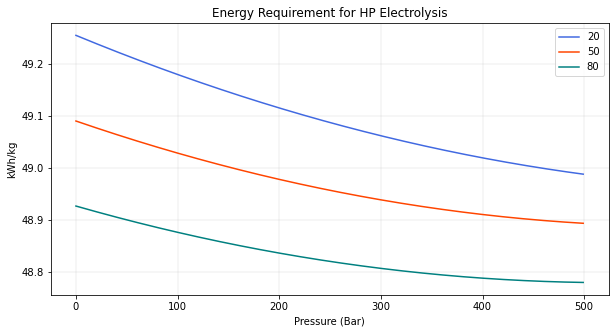

In [49]:
T = 273+20

P = np.zeros(500)
H20 = np.zeros(500)
H50 = np.zeros(500)
H80 = np.zeros(500)

for n in range(500):
    
    P[n] = n
    H20[n] = delta_H(273+20, P[n])
    H50[n] = delta_H(273+50, P[n])
    H80[n] = delta_H(273+80, P[n])
    
    
    
fig, ax = plt.subplots(figsize=[10,5])

ax.plot(P,H20, label='20', color='royalblue')
ax.plot(P,H50, label='50', color='orangered')
ax.plot(P,H80, label='80', color='teal')
ax.title.set_text('Energy Requirement for HP Electrolysis')
ax.grid(lw=0.2)
ax.set_ylabel('kWh/kg')
ax.set_xlabel('Pressure (Bar)')

ax.legend()

# Presentation [1]

showing the temperature effects on the enthalpies of all threee components separately, would be useful to index them at their start points to then see the probably raw change not percentage change relative to one another

Text(400, 7, 'Enthalpy of formation as a function of temp and at 1 bar')

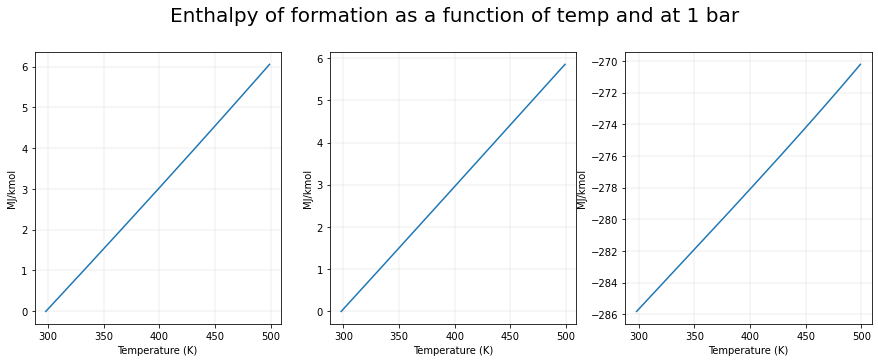

In [6]:
o2 = np.zeros((500-298))
h2 = np.zeros((500-298))
h2o = np.zeros((500-298))
T = np.zeros((500-298))

for n in range((500-298)):
    T[n] = n+298
    o2[n] = enthalpy_O2(T[n])
    h2[n] = enthalpy_H2(T[n])
    h2o[n] = enthalpy_H2O(T[n])
    

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[15,5])

ax[0].plot(T, o2)

ax[1].plot(T, h2)

ax[2].plot(T, h2o)

for n in range(3):
    ax[n].grid(lw=0.2)
    ax[n].set_ylabel('MJ/kmol')
    ax[n].set_xlabel('Temperature (K)')

ax[1].text(400,7,('Enthalpy of formation as a function of temp and at 1 bar'),fontsize=20,
     horizontalalignment='center',
     verticalalignment='center')

# Presentation [2]

showing the pressure effect son the enthalpies of all three components separately

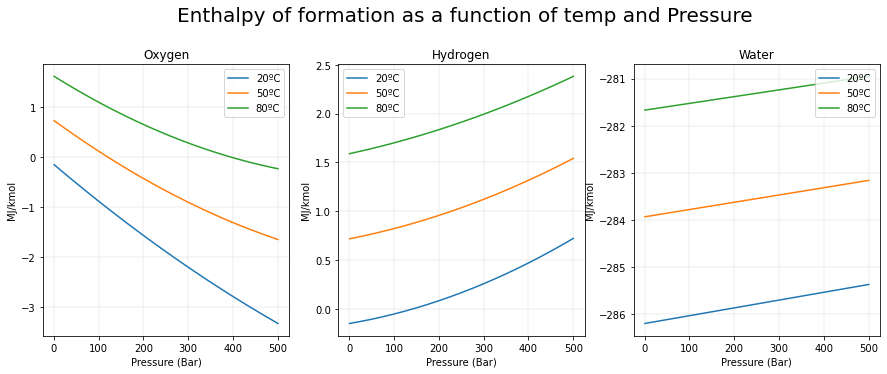

In [7]:

o2 = np.zeros((500,3))
h2 = np.zeros((500,3))
h2o = np.zeros((500,3))
P = np.zeros((500))

for n in range(500):
    P[n] = n+1
    T = 273+20
    o2[n,0] = H_O2(T,P[n])
    h2[n,0] = H_H2(T,P[n])
    h2o[n,0] = H_H2O(T,P[n])
    
    T= 273+50
    o2[n,1] = H_O2(T,P[n])
    h2[n,1] = H_H2(T,P[n])
    h2o[n,1] = H_H2O(T,P[n])
    
    T= 273+80
    o2[n,2] = H_O2(T,P[n])
    h2[n,2] = H_H2(T,P[n])
    h2o[n,2] = H_H2O(T,P[n])
    

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[15,5])

ax[0].plot(P, o2[:,0], label='20ºC')
ax[0].plot(P, o2[:,1], label='50ºC')
ax[0].plot(P, o2[:,2], label='80ºC')
ax[0].title.set_text('Oxygen')

ax[1].plot(P, h2[:,0], label='20ºC')
ax[1].plot(P, h2[:,1], label='50ºC')
ax[1].plot(P, h2[:,2], label='80ºC')
ax[1].title.set_text('Hydrogen')

ax[2].plot(P, h2o[:,0], label='20ºC')
ax[2].plot(P, h2o[:,1], label='50ºC')
ax[2].plot(P, h2o[:,2], label='80ºC')
ax[2].title.set_text('Water')

for n in range(3):
    ax[n].legend()
    ax[n].grid(lw=0.2)
    ax[n].set_ylabel('MJ/kmol')
    ax[n].set_xlabel('Pressure (Bar)')

ax[1].text(259,3,('Enthalpy of formation as a function of temp and Pressure'),fontsize=20,
     horizontalalignment='center',
     verticalalignment='center')

print('')

# Presentation [3]

comparing the enthalpy and hhv voltages to literature to remove doubt

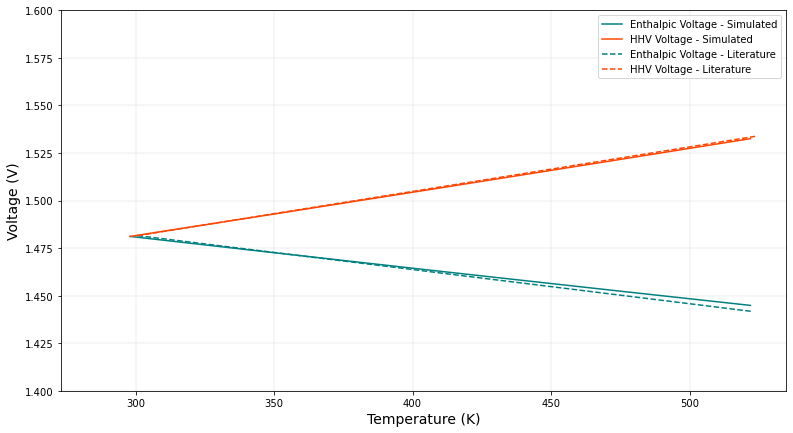

In [64]:
'''
simulated data
'''
enthalpic_voltage = np.zeros(225)
hhv_voltage = np.zeros(225)

temperature = np.zeros(225)

for n in range(225):
    temperature[n] = 273+25+n
    Pressure = 1 #bar
    enthalpic_voltage[n] = delta_H(temperature[n],Pressure)
    
    # convert back to MJ/kmol
    enthalpic_voltage[n] = enthalpic_voltage[n]*2.016*(3600/1000)*0.8
    
    # water_pump is already in MJ/kmol
    hhv_voltage[n] = enthalpic_voltage[n] + water_pump(temperature[n], Pressure)

    
    # convert to voltage
    enthalpic_voltage[n] = (enthalpic_voltage[n]/(2*96485))*1000
    hhv_voltage[n] = (hhv_voltage[n]/(2*96485))*1000
    
'''
data from literature
'''   
x = [300.7008310249308, 522.3074792243767]
y = [1.4815686274509803, 1.441764705882353]

x2 = [300.7008310249308, 523.6925207756233]
y2 = [1.4815686274509803, 1.5337254901960784]


    
fig, ax = plt.subplots( figsize=[13,7])

ax.plot(temperature,enthalpic_voltage, color='teal', label='Enthalpic Voltage - Simulated')
ax.plot(temperature,hhv_voltage, color='orangered',label='HHV Voltage - Simulated')


ax.plot(x,y, linestyle='--', color='teal',label='Enthalpic Voltage - Literature')
ax.plot(x2,y2, linestyle='--', color='orangered', label='HHV Voltage - Literature')



ax.set_xlim(273)
ax.set_ylim(1.4,1.6)
ax.grid(lw=0.2)
ax.set_ylabel('Voltage (V)',fontsize=14)
ax.set_xlabel('Temperature (K)',fontsize=14)
ax.legend()

# Presentation[4]

comparing the effect of pressure on voltage to literature

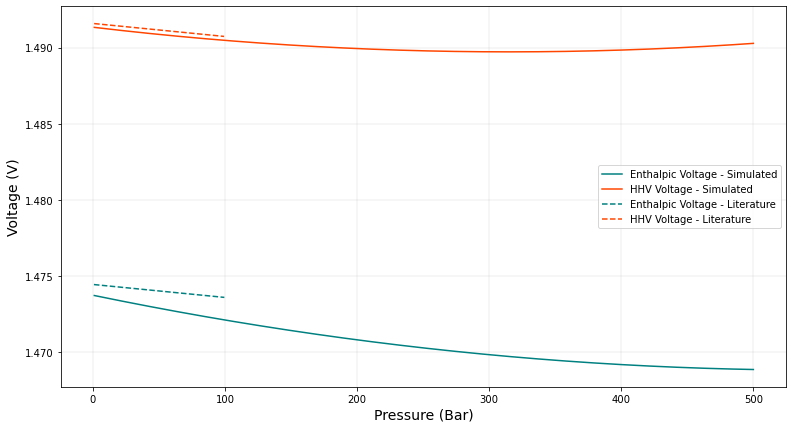

In [65]:
'''
simulated data
'''
enthalpic_voltage_p = np.zeros(500)
hhv_voltage_p = np.zeros(500)

pressure = np.zeros(500)

for n in range(500):
    Temperature = 273+70
    pressure[n] = n+1 #bar
    enthalpic_voltage_p[n] = delta_H(Temperature,pressure[n])
    
    # convert back to MJ/kmol
    enthalpic_voltage_p[n] = enthalpic_voltage_p[n]*2.016*(3600/1000)*0.8
    
    # water_pump is already in MJ/kmol
    hhv_voltage_p[n] = enthalpic_voltage_p[n] + water_pump(Temperature, pressure[n])

    
    # convert to voltage
    enthalpic_voltage_p[n] = (enthalpic_voltage_p[n]/(2*96485))*1000
    hhv_voltage_p[n] = (hhv_voltage_p[n]/(2*96485))*1000
    
'''
data from literature
'''   
x_p = [0.7104795737122558, 99.46714031971578]
y_p = [1.4744382022471911, 1.4735955056179775]

x2_p = [0.888099467140318, 99.28952042628772]
y2_p = [1.4915730337078652, 1.4907303370786518]


    
fig, ax = plt.subplots( figsize=[13,7])

ax.plot(pressure,enthalpic_voltage_p, color='teal', label='Enthalpic Voltage - Simulated')
ax.plot(pressure,hhv_voltage_p, color='orangered',label='HHV Voltage - Simulated')


ax.plot(x_p,y_p, linestyle='--', color='teal',label='Enthalpic Voltage - Literature')
ax.plot(x2_p,y2_p, linestyle='--', color='orangered', label='HHV Voltage - Literature')



# ax.set_xlim(273)
# ax.set_ylim(1.4,1.6)
ax.grid(lw=0.2)
ax.set_ylabel('Voltage (V)',fontsize=14)
ax.set_xlabel('Pressure (Bar)',fontsize=14)
ax.legend()

# Combined

the combined into one figure

[Text(0, 0, '1'),
 Text(100, 0, '100'),
 Text(200, 0, '200'),
 Text(300, 0, '300'),
 Text(400, 0, '400'),
 Text(500, 0, '500')]

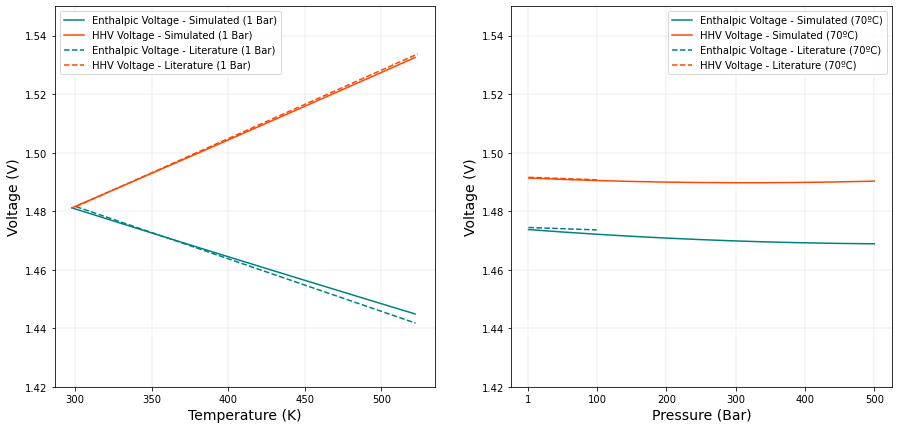

In [74]:
fig, ax = plt.subplots(ncols=2, figsize=[15,7])

ax[1].plot(pressure,enthalpic_voltage_p, color='teal', label='Enthalpic Voltage - Simulated (70ºC)')
ax[1].plot(pressure,hhv_voltage_p, color='orangered',label='HHV Voltage - Simulated (70ºC)')
ax[1].plot(x_p,y_p, linestyle='--', color='teal',label='Enthalpic Voltage - Literature (70ºC)')
ax[1].plot(x2_p,y2_p, linestyle='--', color='orangered', label='HHV Voltage - Literature (70ºC)')

ax[0].plot(temperature,enthalpic_voltage, color='teal', label='Enthalpic Voltage - Simulated (1 Bar)')
ax[0].plot(temperature,hhv_voltage, color='orangered',label='HHV Voltage - Simulated (1 Bar)')
ax[0].plot(x,y, linestyle='--', color='teal',label='Enthalpic Voltage - Literature (1 Bar)')
ax[0].plot(x2,y2, linestyle='--', color='orangered', label='HHV Voltage - Literature (1 Bar)')

# ax.set_xlim(273)
# ax.set_ylim(1.4,1.6)
ax[1].grid(lw=0.2)
ax[1].set_ylabel('Voltage (V)',fontsize=14)
ax[1].set_xlabel('Pressure (Bar)',fontsize=14)
ax[1].legend()

ax[0].grid(lw=0.2)
ax[0].set_ylabel('Voltage (V)',fontsize=14)
ax[0].set_xlabel('Temperature (K)',fontsize=14)
ax[0].legend()

ax[0].set_ylim(1.42,1.55)
ax[1].set_ylim(1.42,1.55)

my_xticks = [0,100,200,300,400,500]
my_xtickslabels = ['1','100','200','300','400','500']
ax[1].set_xticks(my_xticks)
ax[1].set_xticklabels(my_xtickslabels)

In [75]:
delta_H(273+20,1)

49.25417972262878